## Aim : Use RANSAC to remove outlier key point matches and fit a transformation model between two images.

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load images
img1 = cv2.imread('/content/image1.png', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('/content/image2.png', cv2.IMREAD_GRAYSCALE)

In [3]:
# Detect keypoints & descriptors with SIFT
sift = cv2.SIFT_create()
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

In [4]:
# FLANN-based matcher
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)
flann = cv2.FlannBasedMatcher(index_params, search_params)
matches = flann.knnMatch(des1, des2, k=2)

In [5]:
# Lowe's ratio test
good = []
pts1 = []
pts2 = []

for m, n in matches:
    if m.distance < 0.7 * n.distance:
        good.append(m)
        pts1.append(kp1[m.queryIdx].pt)
        pts2.append(kp2[m.trainIdx].pt)

pts1 = np.float32(pts1)
pts2 = np.float32(pts2)

In [6]:
# Find homography with RANSAC
H, mask = cv2.findHomography(pts1, pts2, cv2.RANSAC)

In [7]:
# Draw inliers only
matchesMask = mask.ravel().tolist()
ransac_result = cv2.drawMatches(img1, kp1, img2, kp2, good, None, matchesMask=matchesMask,
                                flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

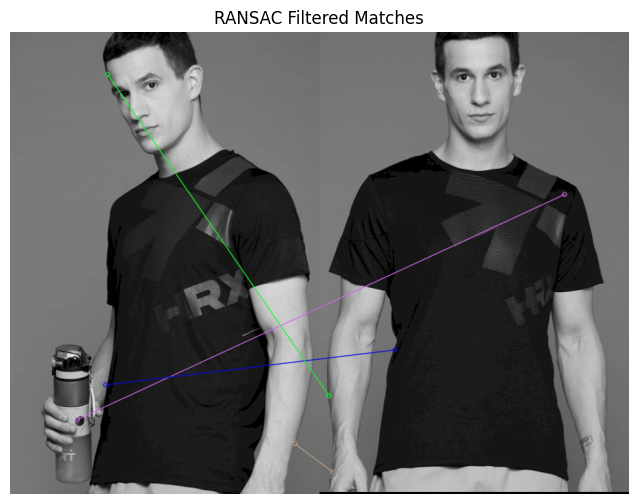

In [8]:
# Show image using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(ransac_result)
plt.title('RANSAC Filtered Matches')
plt.axis('off')
plt.show()